# **Comparing cPCA to Other Dimensionality Reduction Methods**

In [24]:
import time

start = time.time()

### Install Contrastive

In [25]:
!git clone https://github.com/abidlabs/contrastive

fatal: destination path 'contrastive' already exists and is not an empty directory.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.colors import ListedColormap
from contrastive.experiments.supervised import *
%matplotlib inline
warnings.filterwarnings('ignore')

# for plotting
cmap2 = ListedColormap(['r', 'k'])
cmap4 = ListedColormap(['k', 'r', 'g', 'b'])
plt.rc("font",family="sans-serif",size=20)
plt.rcParams["font.sans-serif"] = "Arial"

#hold data
mice = list()
synthetic = list()

In [27]:
!pip install contrastive

### Run cPCA and Other Dimensionality Reduction Methods

In [28]:
from scipy.stats import ortho_group
np.random.seed(0) # for reproducibility

# In A there are four clusters.
N = 400; D = 30; gap=1.5
rotation = ortho_group.rvs(dim=D)

target_ = np.zeros((N, D))
target_[:,0:10] = np.random.normal(0,10,(N,10))
# group 1
target_[0:100, 10:20] = np.random.normal(-gap,1,(100,10))
target_[0:100, 20:30] = np.random.normal(-gap,1,(100,10))
# group 2
target_[100:200, 10:20] = np.random.normal(-gap,1,(100,10))
target_[100:200, 20:30] = np.random.normal(gap,1,(100,10))
# group 3
target_[200:300, 10:20] = np.random.normal(2*gap,1,(100,10))
target_[200:300, 20:30] = np.random.normal(-gap,1,(100,10))
# group 4
target_[300:400, 10:20] = np.random.normal(2*gap,1,(100,10))
target_[300:400, 20:30] = np.random.normal(gap,1,(100,10))
target_ = target_.dot(rotation)
sub_group_labels_ = [0]*100+[1]*100+[ 2]*100+[3]*100

background_ = np.zeros((N, D))
background_[:,0:10] = np.random.normal(0,10,(N,10))
background_[:,10:20] = np.random.normal(0,3,(N,10))
background_[:,20:30] = np.random.normal(0,1,(N,10))
background_ = background_.dot(rotation)

data_ = np.concatenate((background_, target_))
labels_ = len(background_)*[0] + len(target_)*[1]

In [29]:
print(np.asarray(data_).shape)
print(np.asarray(labels_).shape)

(800, 30)
(800,)


In [30]:
data = np.genfromtxt('contrastive/experiments/datasets/Data_Cortex_Nuclear.csv',delimiter=',',
                     skip_header=1,usecols=range(1,78),filling_values=0)
classes = np.genfromtxt('contrastive/experiments/datasets/Data_Cortex_Nuclear.csv',delimiter=',',
                        skip_header=1,usecols=range(78,81),dtype=None)

In [31]:
classes.shape

(1080, 3)

In [32]:
target_idx_A = np.where((classes[:,-1]==b'S/C') & (classes[:,-2]==b'Saline') & (classes[:,-3]==b'Control'))[0]
target_idx_B = np.where((classes[:,-1]==b'S/C') & (classes[:,-2]==b'Saline') & (classes[:,-3]==b'Ts65Dn'))[0]

sub_group_labels = len(target_idx_A)*[0] + len(target_idx_B)*[1]
target_idx = np.concatenate((target_idx_A,target_idx_B))

target = data[target_idx]
target = (target-np.mean(target,axis=0)) / np.std(target,axis=0) # standardize the dataset

background_idx = np.where((classes[:,-1]==b'C/S') & (classes[:,-2]==b'Saline') & (classes[:,-3]==b'Control'))
# background_idx = np.where((classes[:,-1]==b'C/S') & (classes[:,-2]==b'Saline') & (classes[:,-3]==b'Ts65Dn'))
background = data[background_idx]
background = (background-np.mean(background,axis=0)) / np.std(background,axis=0) # standardize the dataset
labels = len(background)*[0] + len(target)*[1]
data = np.concatenate((background, target))

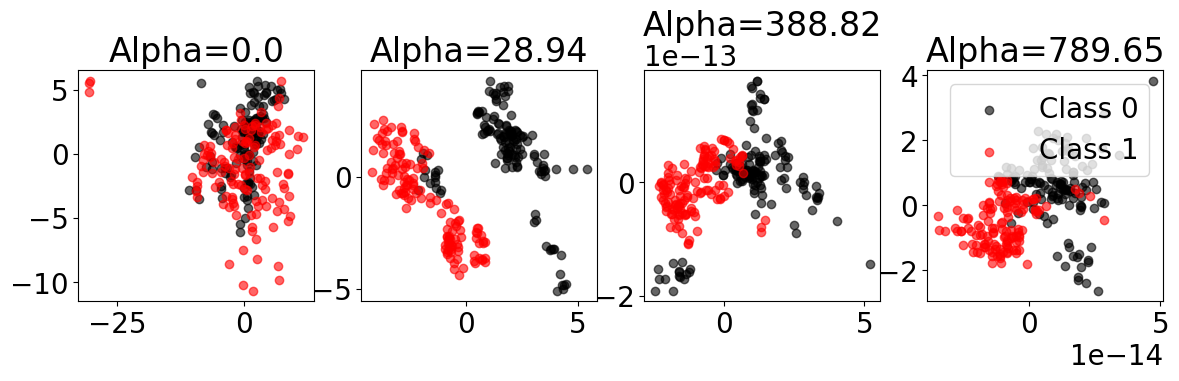

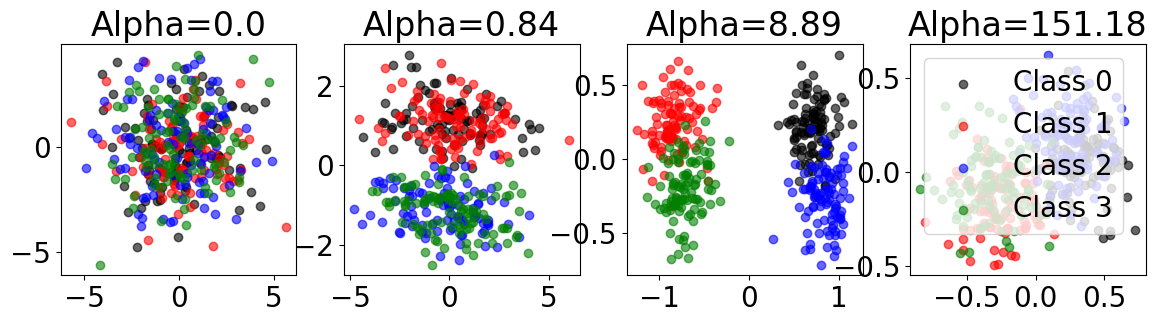

In [33]:
from contrastive.contrastive.__init__ import CPCA
mdl = CPCA()

projected_data = mdl.fit_transform(target, background, plot=True, active_labels=sub_group_labels)
projected_data_ = mdl.fit_transform(target_, background_, plot=True, active_labels=sub_group_labels_)

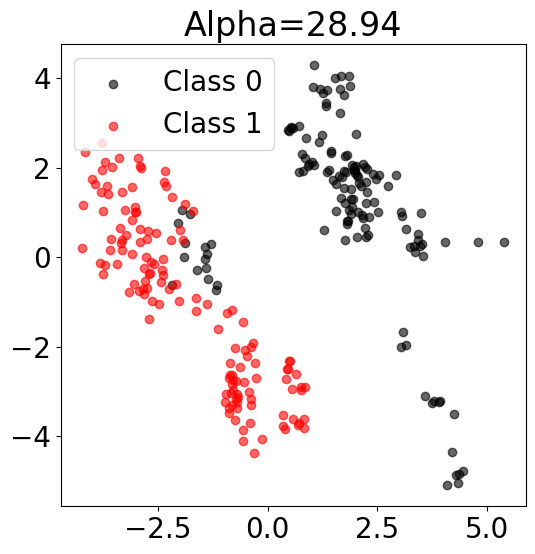

In [34]:
mdl = CPCA()
projected_data = mdl.fit_transform(target, background, plot=True, active_labels=sub_group_labels, alpha_selection='manual', alpha_value=28.94,)


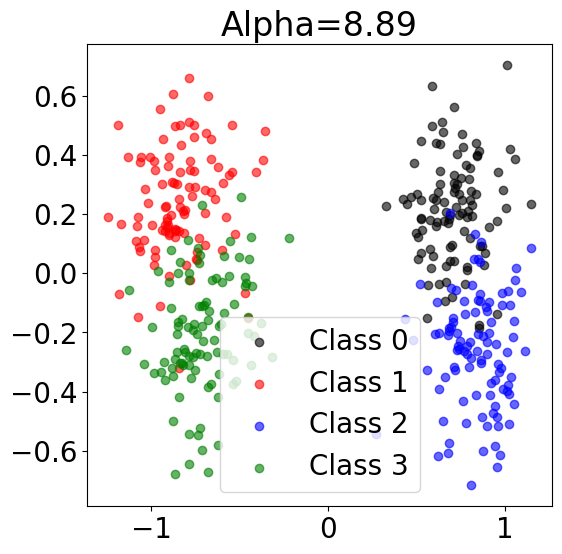

In [35]:
mdl = CPCA()
projected_data = mdl.fit_transform(target_, background_, plot=True, active_labels=sub_group_labels_, alpha_selection='manual', alpha_value=8.89,)


Text(0.5, 1.0, 'Linear Discriminant Analysis: Synthetic Data')

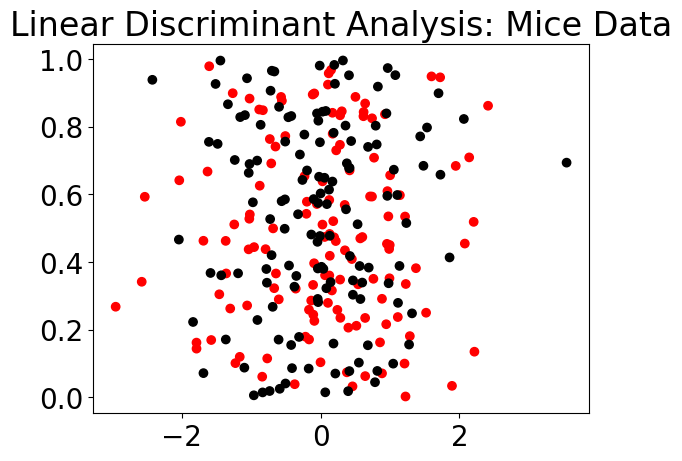

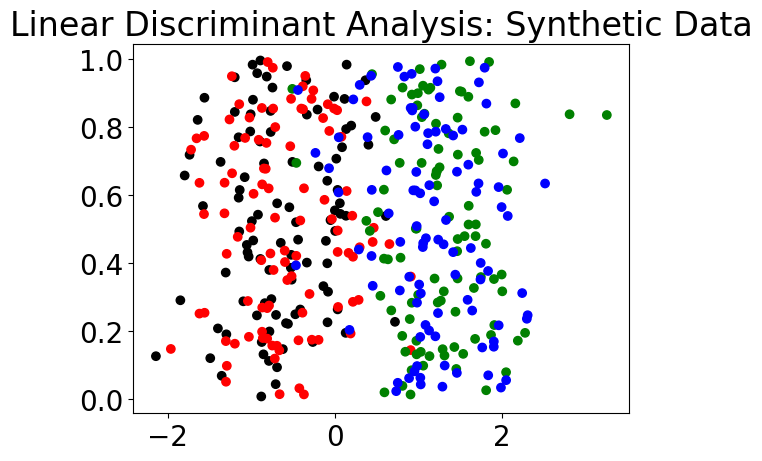

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
mdl = LDA()

projected_data = mdl.fit(data, labels).transform(target)
random_y_values = np.random.random(size=projected_data.shape)
plt.figure()
plt.scatter(projected_data, random_y_values, c=sub_group_labels, cmap=cmap2)
plt.title('Linear Discriminant Analysis: Mice Data')

projected_data_ = mdl.fit(data_, labels_).transform(target_)
random_y_values_ = np.random.random(size=projected_data_.shape)
plt.figure()
plt.scatter(projected_data_, random_y_values_, c=sub_group_labels_, cmap=cmap4)
plt.title('Linear Discriminant Analysis: Synthetic Data')

(400, 30)
(400,)


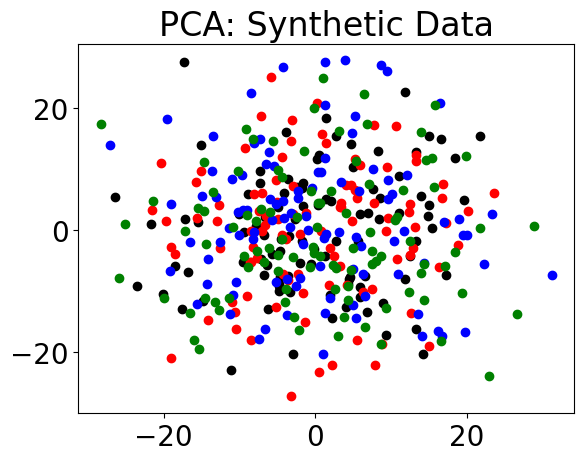

"\nrandom_y_values = np.random.random(size=projected_data.shape)\nplt.figure()\nplt.scatter(projected_data, random_y_values, c=sub_group_labels, cmap=cmap2)\nplt.title('Linear Discriminant Analysis: Mice Data')\n\nprojected_data_ = mdl.fit(data_, labels_).transform(target_)\nrandom_y_values_ = np.random.random(size=projected_data_.shape)\nplt.figure()\nplt.scatter(projected_data_, random_y_values_, c=sub_group_labels_, cmap=cmap4)\nplt.title('Linear Discriminant Analysis: Synthetic Data')\n"

In [37]:
from sklearn.decomposition import PCA
mdl = PCA(
    n_components=2
)

projected_data_synthetic = projected_data = mdl.fit_transform(target_)

print(target_.shape)
print(np.asarray(sub_group_labels_).shape)

color_dict_4 = {
    0: "black",
    1: "red",
    2: "blue",
    3: "green"
}



for i in range(len(projected_data_synthetic)):
    plt.scatter(projected_data_synthetic[i,0], projected_data_synthetic[i,1], c=color_dict_4[sub_group_labels_[i]])


plt.title("PCA: Synthetic Data")
plt.show()
'''
random_y_values = np.random.random(size=projected_data.shape)
plt.figure()
plt.scatter(projected_data, random_y_values, c=sub_group_labels, cmap=cmap2)
plt.title('Linear Discriminant Analysis: Mice Data')

projected_data_ = mdl.fit(data_, labels_).transform(target_)
random_y_values_ = np.random.random(size=projected_data_.shape)
plt.figure()
plt.scatter(projected_data_, random_y_values_, c=sub_group_labels_, cmap=cmap4)
plt.title('Linear Discriminant Analysis: Synthetic Data')
'''

In [38]:
print(set(sub_group_labels_))

{0, 1, 2, 3}


Text(0.5, 1.0, 'Quadratic Discriminant Analysis: Synthetic Data')

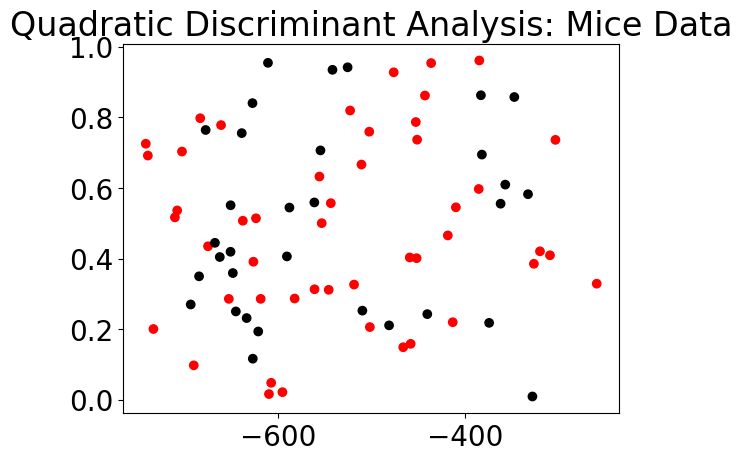

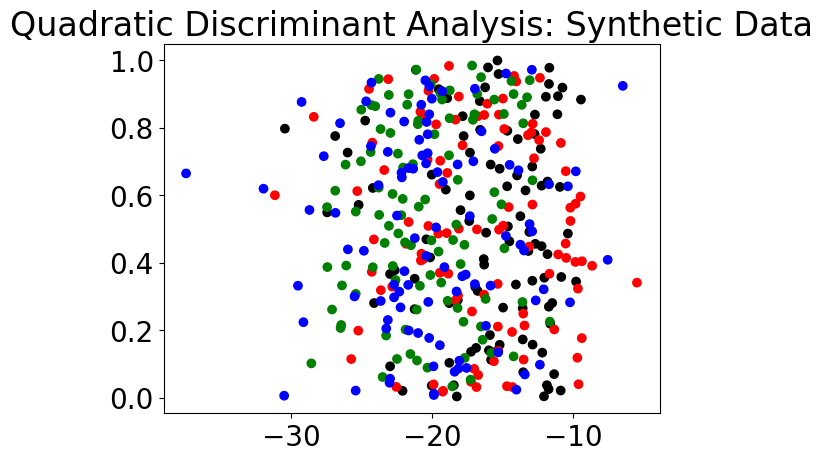

In [39]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
mdl = QDA()

projected_data = mdl.fit(data, labels).predict_log_proba(target)[:,0]
random_y_values = np.random.random(size=projected_data.shape)
plt.figure()
# print(projected_data.shape,random_y_values.shape)
plt.scatter(projected_data, random_y_values, c=sub_group_labels, cmap=cmap2)
plt.title('Quadratic Discriminant Analysis: Mice Data')

projected_data_ = mdl.fit(data_, labels_).predict_log_proba(target_)[:,0]
random_y_values_ = np.random.random(size=projected_data_.shape)
plt.figure()
plt.scatter(projected_data_, random_y_values_, c=sub_group_labels_, cmap=cmap4)
plt.title('Quadratic Discriminant Analysis: Synthetic Data')

Text(0.5, 1.0, 'Supervised PCA: Synthetic Data')

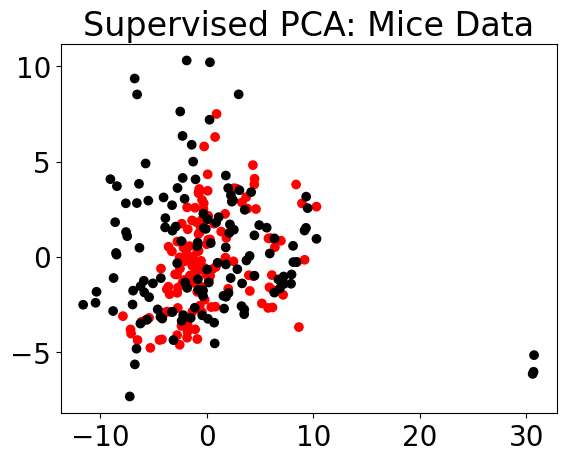

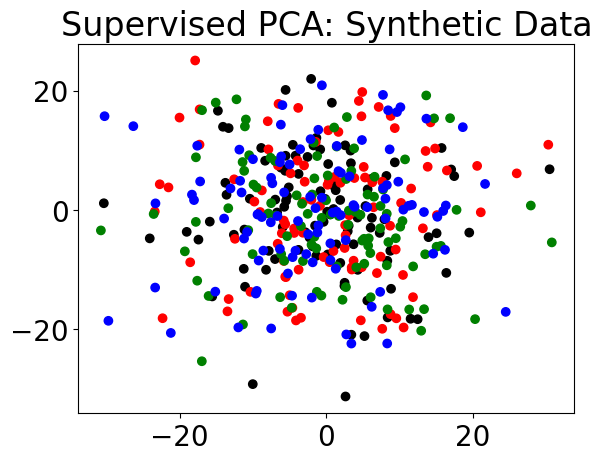

In [40]:
from contrastive.experiments.supervised import SupervisedPCAClassifier

mdl = SupervisedPCAClassifier(n_components=2)

projected_data = mdl.fit(data, labels).get_transformed_data(target)
plt.figure()
plt.scatter(*projected_data.T, c=sub_group_labels, cmap=cmap2)
plt.title('Supervised PCA: Mice Data')

projected_data_ = mdl.fit(data_, labels_).get_transformed_data(target_)
plt.figure()
plt.scatter(*projected_data_.T, c=sub_group_labels_, cmap=cmap4)
plt.title('Supervised PCA: Synthetic Data')

Text(0.5, 1.0, 'Multidimensional Scaling: Synthetic Data')

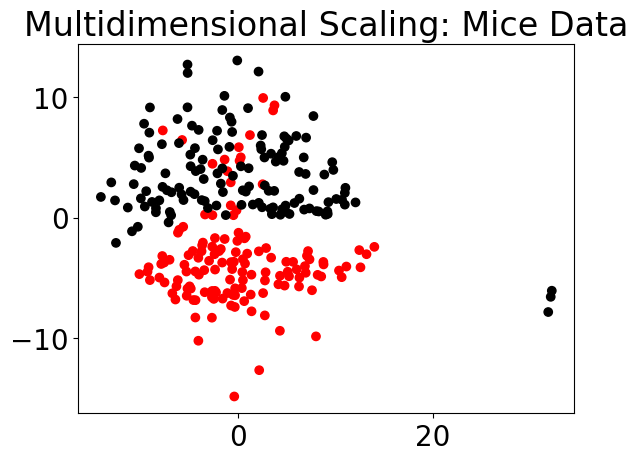

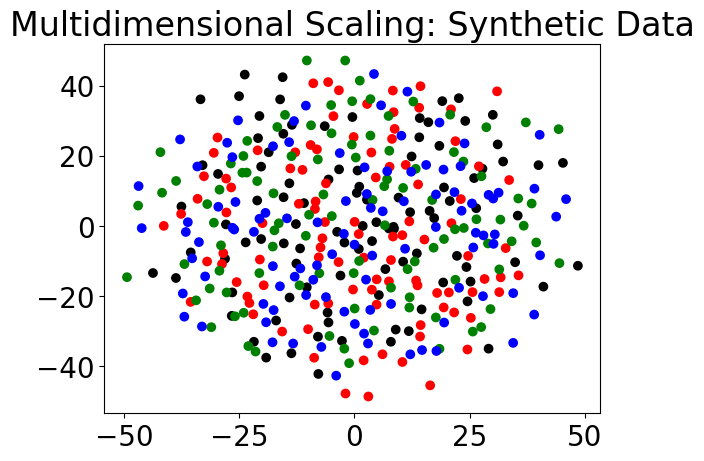

In [41]:
from sklearn.manifold import MDS
np.random.seed(0) # for reproducibility

mdl = MDS(n_components=2)
projected_data = mdl.fit_transform(target)
plt.figure()
plt.scatter(*projected_data.T, c=sub_group_labels, cmap=cmap2)
plt.title('Multidimensional Scaling: Mice Data')

projected_data_ = mdl.fit_transform(target_)
plt.figure()
plt.scatter(*projected_data_.T, c=sub_group_labels_, cmap=cmap4)
plt.title('Multidimensional Scaling: Synthetic Data')

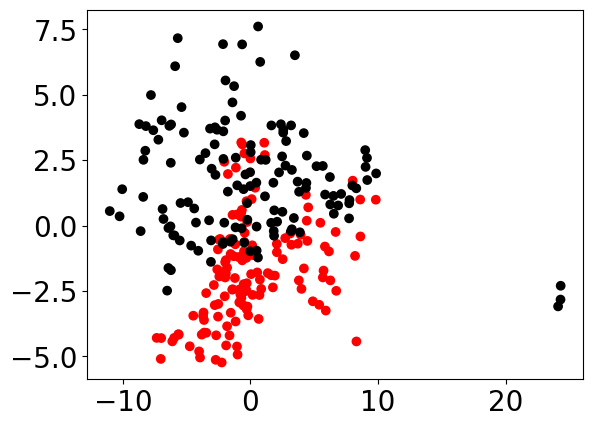

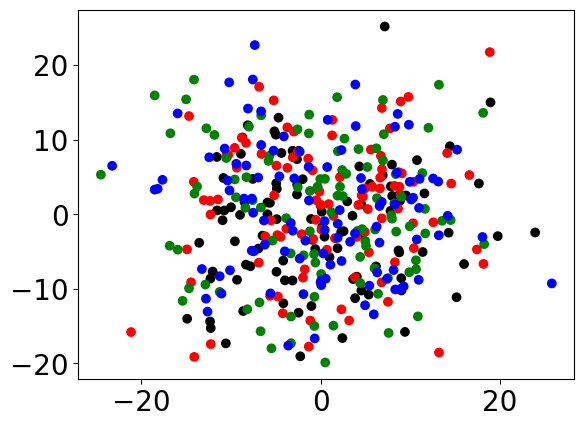

In [42]:
from contrastive.experiments.pursuit import R_pca
from sklearn.decomposition import PCA

mdl = PCA(n_components=2) # this will be used to select the top 2 principal pursuit components

rpca = R_pca(target)
L, S = rpca.fit(max_iter=10000) #L is the low-rank structure we are interested in
projected_data = mdl.fit_transform(L)
plt.figure()
plt.scatter(*projected_data.T, c=sub_group_labels, cmap=cmap2)

rpca_ = R_pca(target_)
L_, S_ = rpca_.fit(max_iter=10000) #L is the low-rank structure we are interested in
projected_data_ = mdl.fit_transform(L_)
plt.figure()
plt.scatter(*projected_data_.T, c=sub_group_labels_, cmap=cmap4)

Text(0.5, 1.0, 'Factor Analysis: Synthetic Data')

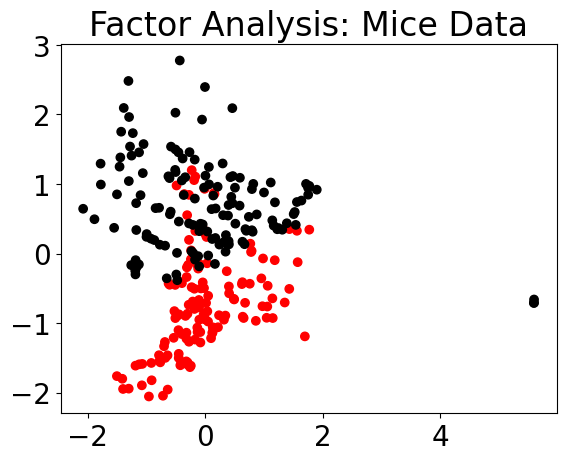

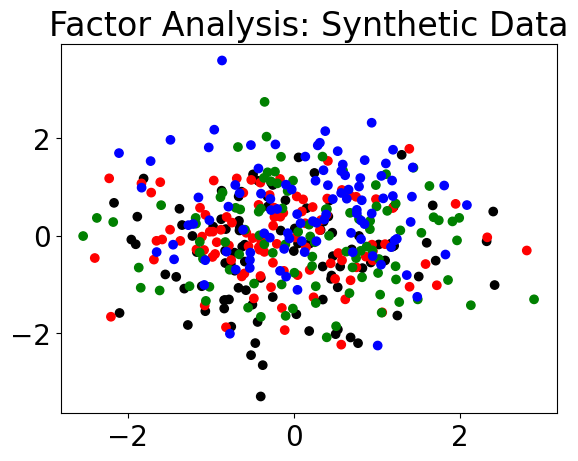

In [43]:
from sklearn.decomposition import FactorAnalysis as FA

mdl = FA(n_components=2)

projected_data = mdl.fit_transform(target)
plt.figure()
plt.scatter(*projected_data.T, c=sub_group_labels, cmap=cmap2)
plt.title('Factor Analysis: Mice Data')

projected_data_ = mdl.fit_transform(target_)
plt.figure()
plt.scatter(*projected_data_.T, c=sub_group_labels_, cmap=cmap4)
plt.title('Factor Analysis: Synthetic Data')

Text(0.5, 1.0, 'ICA: Synthetic Data')

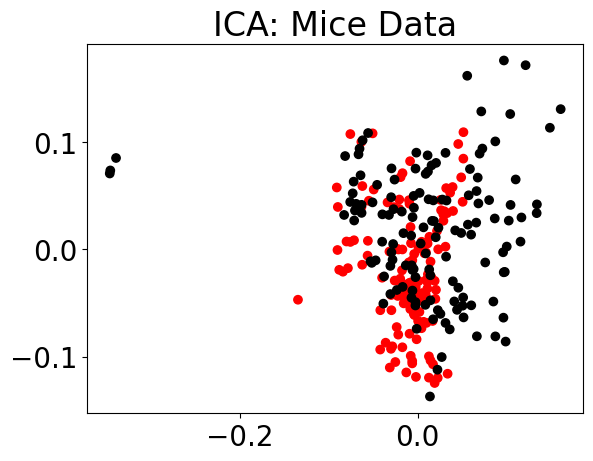

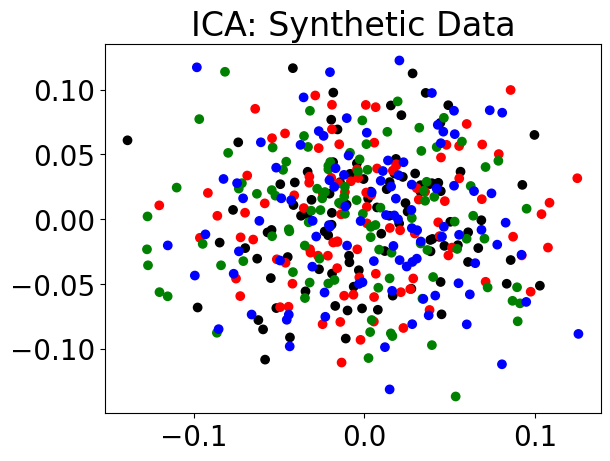

In [44]:
from sklearn.decomposition import FastICA as ICA

mdl = ICA(n_components=2)

projected_data = mdl.fit_transform(target)
plt.figure()
plt.scatter(*projected_data.T, c=sub_group_labels, cmap=cmap2)
plt.title('ICA: Mice Data')

projected_data_ = mdl.fit_transform(target_)
plt.figure()
plt.scatter(*projected_data_.T, c=sub_group_labels_, cmap=cmap4)
plt.title('ICA: Synthetic Data')

In [45]:
end = time.time()

print(f"Elapsed time: {round(end-start, 2)} seconds")

Elapsed time: 34.31 seconds
